In [60]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse 
import matplotlib as mpl

import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from math import sqrt
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Task 
You are given the web traffic data for a particular website, which is measured in terms of user sessions. You are provided with the number of sessions for a time series of  consecutive days starting from Oct 1,2012. Your task is to predict the number of sessions for the next  days.

In [31]:
#Read txt file and return it as a list
visit= pd.read_csv('input00.txt',sep=" ",header=None)
 
print(visit)   

         0
0     1133
1     1339
2     1462
3     1702
4     1656
...    ...
1129  3829
1130  3697
1131  3480
1132  3014
1133  2671

[1134 rows x 1 columns]


In [34]:
visit=visit.drop([0])

In [67]:
visit.index
visit.index = pd.to_datetime(visit.index)
visit

,0
1970-01-01 00:00:00.000000001,1339
1970-01-01 00:00:00.000000002,1462
1970-01-01 00:00:00.000000003,1702
1970-01-01 00:00:00.000000004,1656
1970-01-01 00:00:00.000000005,1439
...,...
1970-01-01 00:00:00.000001129,3829
1970-01-01 00:00:00.000001130,3697
1970-01-01 00:00:00.000001131,3480
1970-01-01 00:00:00.000001132,3014


In [66]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(visit, x=visit.index, y=visit.value, title='Daily visits to a website')

AttributeError: 'DataFrame' object has no attribute 'value'

<AxesSubplot:>

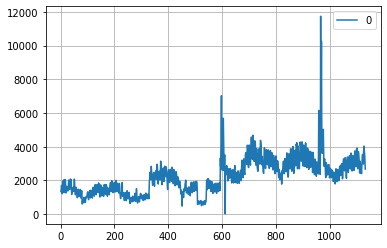

In [39]:
visit.plot(grid=True)


In [48]:

 
# Convert the index to a datetime object
visit.index = pd.to_datetime(visit.index, format='%d')

ValueError: unconverted data remains: 2

In [51]:
#Check for Stationarity
 
# Compute and print ADF p-value
result = adfuller(visit)
print("The p-value for the ADF test is ", result[1])


The p-value for the ADF test is  0.12002377815808651


We can reject the hypothesis that the website visits is a random walk.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

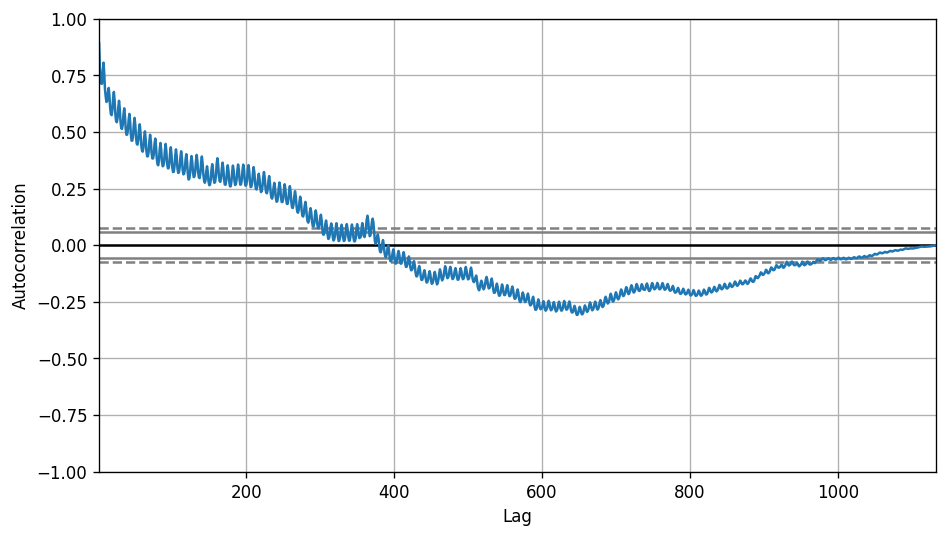

In [58]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(visit)

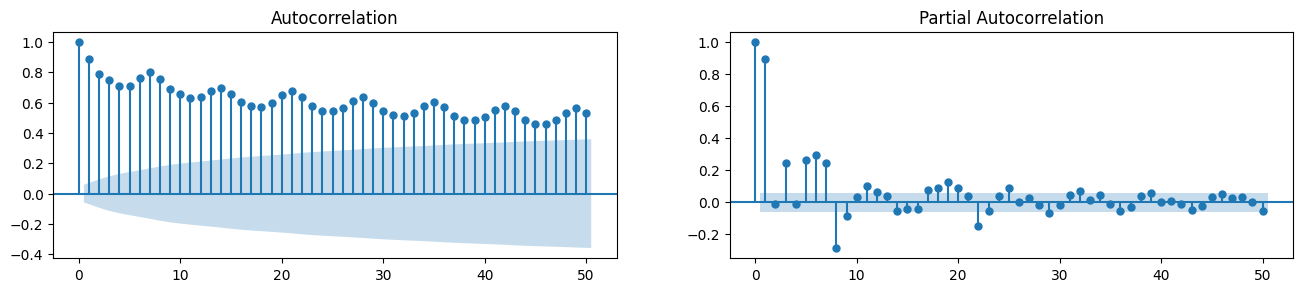

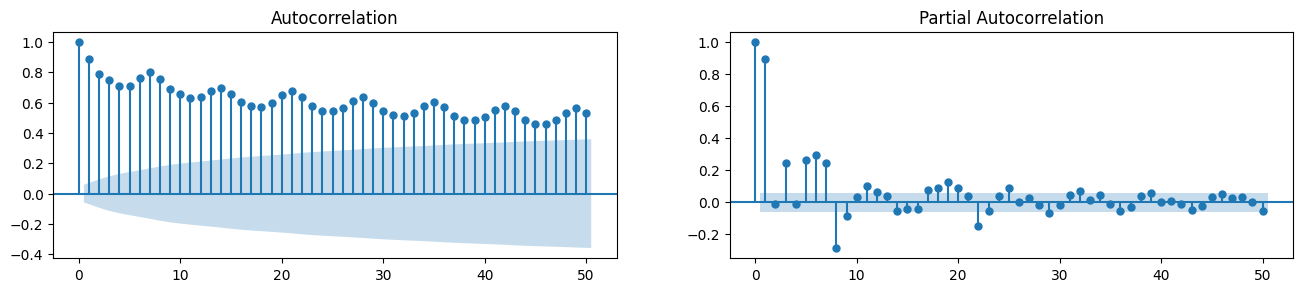

In [59]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(visit, lags=50, ax=axes[0])
plot_pacf(visit, lags=50, ax=axes[1])

In [49]:
#convert visits to percentage change
visit.pct_change()

,0
1,NaN
2,0.091860
3,0.164159
4,-0.027027
5,-0.131039
...,...
1129,-0.049876
1130,-0.034474
1131,-0.058696
1132,-0.133908


In [40]:
# Daily change in visits 
daily_diff =visit.diff()

In [53]:
# Compute and print the autocorrelation of daily changes
autocorrelation_daily = visit.autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

AttributeError: 'DataFrame' object has no attribute 'autocorr'

In [ ]:
# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)
